# Coefficients $\lambda_i$ and $\gamma_i$

We study here the coefficients $\lambda_i$ and $\gamma_i$ that are required to find the analytical solution. We have introduced the following quantities
$$
    A = a+c+bcd \,, 
    \quad
    B = ac \,, 
    \quad
    C = \frac{1}{bc} \,, 
    \quad 
    D = \frac{a+bd}{bc} \,,
$$
which are defined in terms of the original Hamiltonian parameters as
$$
    a = -\frac{E_0^+}{B_1-D_1} \,, 
    \quad
    b = \frac{i p A_1}{B_1-D_1} \,,
    \quad
    c = \frac{E_0^-}{B_1+D_1} \,, 
    \quad
    d = \frac{-i p A_1}{B_1+D_1} \,,
$$
where
$$
    E_0^\pm = \epsilon_0 \pm \mu_0 + p \Lambda - \hbar \omega \,,
    \qquad
    p = 
    \begin{cases}
        +1 \qquad \text{for} \quad \sigma=\uparrow \,, \\[5pt]
        %
        -1 \qquad \text{for} \quad \sigma=\downarrow \,.
    \end{cases}
$$

In [17]:
import numpy as np

# The parameters are taken from Ref[4] in Edi's paper. 
# Mind that the Hamiltonian is defined differently and hence the sign of M0 is flipped
# Furthermore, we neglect aasymmetry (D1=0) and Dirac point energy (C0=0)

# bismuth selenide 
#Bi2Se3 = dict(C0 = -0.0068, D1 = 1.3, A1 = 2.2, M0 = 0.28, B1 = 10)
Bi2Se3 = dict(C0 = 0., D1 = 0., A1 = 2.26, M0 = 0.28, B1 = 6.86)
# bismuth telluride
Bi2Te3 = dict(C0 = 0., D1 = 0., A1 = 0.3, M0 = 0.3, B1 = 2.79)
# antimony telluride
Sb2Te3 = dict(C0 = 0., D1 = 0., A1 = 0.84, M0 = 0.22, B1 = 19.64)


# function which determines the coefficients lambda_i and gamma_i
def parameters(spin, L, omega, all=False, C0 = -0.0068, D1 = 1.3, A1 = 2.2, M0 = 0.28, B1 = 10, hbar = 1.):

    # switch over non-zero components
    match spin:
            
        # spin-up components
        case 'up': p = +1

        # spin-down components
        case 'down': p = -1
                                   
        # trivial components
        case _: p = 0

    
    # E0 plus/minus
    E0p = C0 + M0 + p*L - hbar*omega; E0m = C0 - M0 + p*L - hbar*omega
            
    # parameters a,b,c,d
    a = -E0p/(B1-D1); b = 1j*p*A1/(B1-D1); c = E0m/(B1+D1); d = -1j*p*A1/(B1+D1)

    # parameters A,B,C,D
    A = a+c+b*d; B = a*c; C = 1./(b*c); D = (a+b*d)/(b*c); Delta = np.sqrt(A**2-4*B)

    # lambda parameters
    lambda1 = np.sqrt((A-Delta)/2); lambda2 = np.sqrt((A+Delta)/2)
    # gamma parameters
    gamma1 = lambda1*( C*(lambda1**2)-D ); gamma2 = lambda2*( C*(lambda2**2)-D ) 

    if all==False:
        return lambda1, lambda2, gamma1, gamma2
    else:
        return lambda1, lambda2, gamma1, gamma2, E0p, E0m, A,B,C,D, a,b,c,d


Zeeman = np.linspace(-0.050, 0.050, 200)
lambda1up = []; lambda2up = []; gamma1up = []; gamma2up = [];
lambda1dw = []; lambda2dw = []; gamma1dw = []; gamma2dw = [];



params = Sb2Te3
A1 = params['A1']; M0 = params['M0']; B1 = params['B1']
print(A1**2 - 4*M0*B1)

# loop over Zeeman
for L in Zeeman:

    # spin up
    l1,l2,g1,g2 = parameters(spin='up', L=L, omega=0.005, **params)
    # append to lists
    lambda1up.append(l1); lambda2up.append(l2); gamma1up.append(g1); gamma2up.append(g2)
    
    # spin down
    l1,l2,g1,g2 = parameters(spin='down', L=L, omega=0.005, **params)
    # append to lists
    lambda1dw.append(l1); lambda2dw.append(l2); gamma1dw.append(g1); gamma2dw.append(g2)

lambda1up = np.array(lambda1up); lambda1dw = np.array(lambda1dw); lambda2up = np.array(lambda2up); lambda2dw = np.array(lambda2dw)
gamma1up = np.array(gamma1up); gamma1dw = np.array(gamma1dw); gamma2up = np.array(gamma2up); gamma2dw = np.array(gamma2dw)

-16.5776


### <font color='black'> Plot vs Zeeman </font> 

We plot the parameters $\lambda_i$ and $\gamma_i$ as a function of the Zeeman energy.

#### <font color='green'> **Lambda Parameters** </font> 

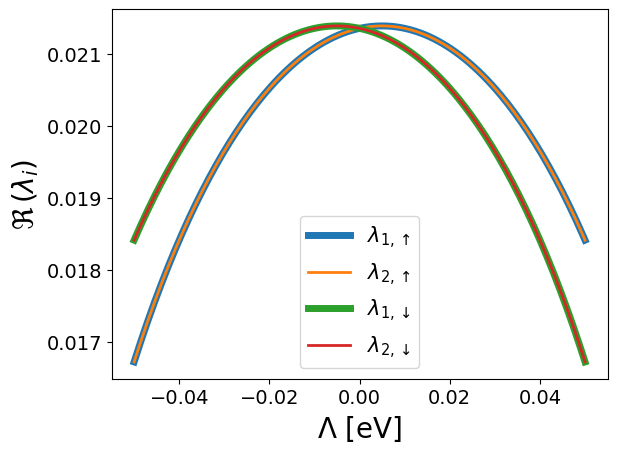

In [18]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

# subplots
fig, ax = plt.subplots(1,1)

ax.plot(Zeeman, lambda1up.real, lw=5, label='$\lambda_{1, \\uparrow}$')
ax.plot(Zeeman, lambda2up.real, lw=2, label='$\lambda_{2, \\uparrow}$')
ax.plot(Zeeman, lambda1dw.real, lw=5, label='$\lambda_{1, \downarrow}$')
ax.plot(Zeeman, lambda2dw.real, lw=2, label='$\lambda_{2, \downarrow}$')                    
    
ax.set_xlabel("$\Lambda$ [eV]", fontsize = 20)
ax.set_ylabel("$\Re \, (\lambda_i)$", fontsize = 20)

        
ax.tick_params(axis='both', which='major', labelsize=14)        
ax.legend(fontsize=15);

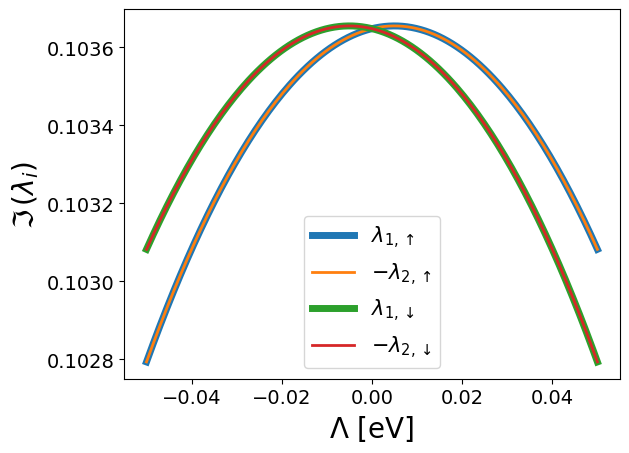

In [19]:
# subplots
fig, ax = plt.subplots(1,1)

ax.plot(Zeeman, lambda1up.imag, lw=5, label='$\lambda_{1, \\uparrow}$')
ax.plot(Zeeman, -lambda2up.imag, lw=2, label='$-\lambda_{2, \\uparrow}$')
ax.plot(Zeeman, lambda1dw.imag, lw=5, label='$\lambda_{1, \downarrow}$')
ax.plot(Zeeman, -lambda2dw.imag, lw=2, label='$-\lambda_{2, \downarrow}$')

ax.set_xlabel("$\Lambda$ [eV]", fontsize = 20)
ax.set_ylabel("$\Im \, (\lambda_i)$", fontsize = 20)
        
ax.tick_params(axis='both', which='major', labelsize=14)        
ax.legend(fontsize=15);

#### <font color='green'> **Gamma Parameters** </font> 

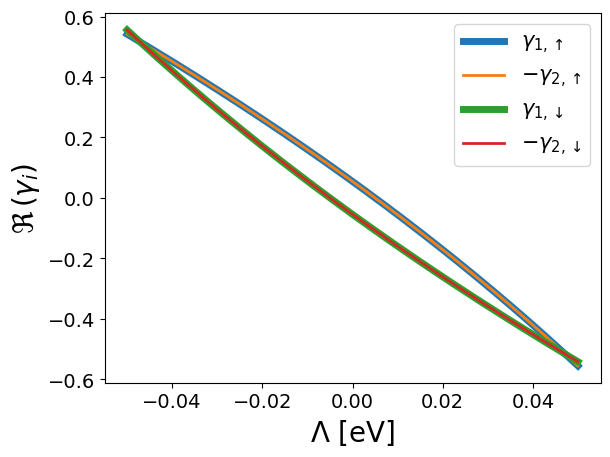

In [20]:
# subplots
fig, ax = plt.subplots(1,1)

ax.plot(Zeeman, gamma1up.real, lw=5, label='$\gamma_{1, \\uparrow}$')
ax.plot(Zeeman, -gamma2up.real, lw=2, label='$-\gamma_{2, \\uparrow}$')
ax.plot(Zeeman, gamma1dw.real, lw=5, label='$\gamma_{1, \downarrow}$')
ax.plot(Zeeman, -gamma2dw.real, lw=2, label='$-\gamma_{2, \downarrow}$')                    
    
ax.set_xlabel("$\Lambda$ [eV]", fontsize = 20)
ax.set_ylabel("$\Re \, (\gamma_i)$", fontsize = 20)

ax.tick_params(axis='both', which='major', labelsize=14)        
ax.legend(fontsize=15);

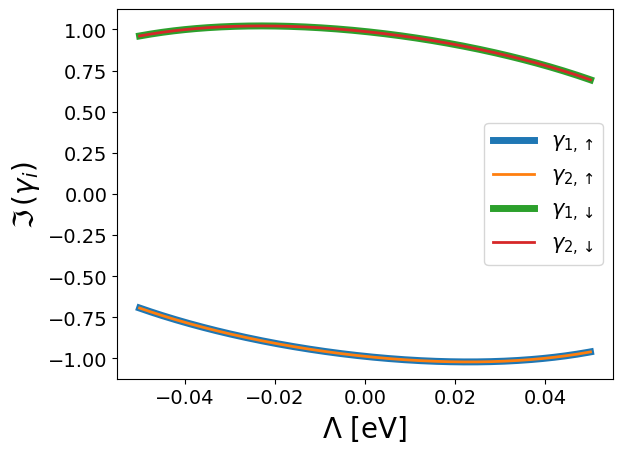

In [21]:
# subplots
fig, ax = plt.subplots(1,1)

ax.plot(Zeeman, gamma1up.imag, lw=5, label='$\gamma_{1, \\uparrow}$')
ax.plot(Zeeman, gamma2up.imag, lw=2, label='$\gamma_{2, \\uparrow}$')
ax.plot(Zeeman, gamma1dw.imag, lw=5, label='$\gamma_{1, \downarrow}$')
ax.plot(Zeeman, gamma2dw.imag, lw=2, label='$\gamma_{2, \downarrow}$')                    
    
ax.set_xlabel("$\Lambda$ [eV]", fontsize = 20)
ax.set_ylabel("$\Im \, (\gamma_i)$", fontsize = 20)

        
ax.tick_params(axis='both', which='major', labelsize=14)        
ax.legend(fontsize=15);

### <font color='black'> Plot vs Energy </font> 

We plot the parameters $\lambda_i$ and $\gamma_i$ as a function of the energy $\omega$.

In [22]:
energy = np.linspace(-0.005, 0.005, 200)
lambda1up = []; lambda2up = []; gamma1up = []; gamma2up = [];
lambda1dw = []; lambda2dw = []; gamma1dw = []; gamma2dw = [];

# loop over Zeeman
for e in energy:

    # spin up
    l1,l2,g1,g2 = parameters(spin='up', L=0.010, omega=e, **params)
    # append to lists
    lambda1up.append(l1); lambda2up.append(l2); gamma1up.append(g1); gamma2up.append(g2)
    
    # spin down
    l1,l2,g1,g2 = parameters(spin='down', L=0.010, omega=e, **params)
    # append to lists
    lambda1dw.append(l1); lambda2dw.append(l2); gamma1dw.append(g1); gamma2dw.append(g2)

lambda1up = np.array(lambda1up); lambda1dw = np.array(lambda1dw); lambda2up = np.array(lambda2up); lambda2dw = np.array(lambda2dw)
gamma1up = np.array(gamma1up); gamma1dw = np.array(gamma1dw); gamma2up = np.array(gamma2up); gamma2dw = np.array(gamma2dw)

#### <font color='green'> **Lambda Parameters** </font> 

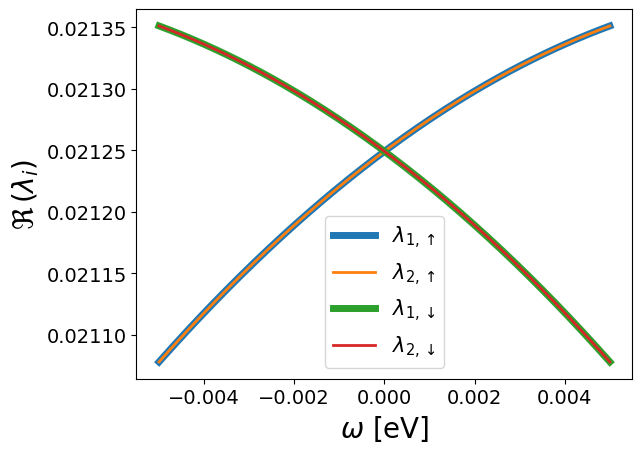

In [23]:
# subplots
fig, ax = plt.subplots(1,1)

ax.plot(energy, lambda1up.real, lw=5, label='$\lambda_{1, \\uparrow}$')
ax.plot(energy, lambda2up.real, lw=2, label='$\lambda_{2, \\uparrow}$')
ax.plot(energy, lambda1dw.real, lw=5, label='$\lambda_{1, \downarrow}$')
ax.plot(energy, lambda2dw.real, lw=2, label='$\lambda_{2, \downarrow}$')                    
    
ax.set_xlabel("$\omega$ [eV]", fontsize = 20)
ax.set_ylabel("$\Re \, (\lambda_i)$", fontsize = 20)

        
ax.tick_params(axis='both', which='major', labelsize=14)        
ax.legend(fontsize=15);

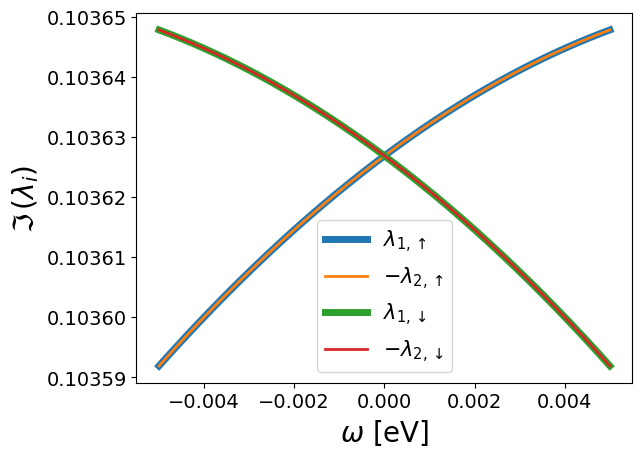

In [24]:
# subplots
fig, ax = plt.subplots(1,1)

ax.plot(energy, lambda1up.imag, lw=5, label='$\lambda_{1, \\uparrow}$')
ax.plot(energy, -lambda2up.imag, lw=2, label='$-\lambda_{2, \\uparrow}$')
ax.plot(energy, lambda1dw.imag, lw=5, label='$\lambda_{1, \downarrow}$')
ax.plot(energy, -lambda2dw.imag, lw=2, label='$-\lambda_{2, \downarrow}$')                    
    
ax.set_xlabel("$\omega$ [eV]", fontsize = 20)
ax.set_ylabel("$\Im \, (\lambda_i)$", fontsize = 20)

        
ax.tick_params(axis='both', which='major', labelsize=14)        
ax.legend(fontsize=15);